In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
##changing class (using code from lab)

# Class defining an Ising lattice object describing an L-site 2D lattice of classical spins
class IsingLattice2D():
    """Object describing a 1D Ising lattice, with size L, temperature T and magnetic field h.
    Includes methods to compute the magnetisation using the Metropolis Monte Carlo algorithm"""
    
    # Initialise the lattice for a given system size, temperature, and external field
    def __init__(self, L, T, h):
        self.size = L 
        self.temp = T
        self.field = h
        self.coupling = np.diag(np.ones(L-1),1) #line of 1s accross upper diag
        self.coupling[0,L-1] = 1 #one in top right
#         self.state = np.random.choice([-1,1], (L,L) )
        self.state = np.ones((L,L)) #changed this to investigate initial state effect 
        self.mag = self.get_mag()
        self.energy = self.get_energy()
     
    # Set the state
    def set_state(self, state):
        self.state = state
        self.mag = self.get_mag()
        self.energy = self.get_energy()
     
    # Compute the magnetisation 
    def get_mag(self): 
        return np.sum(self.state) #needs to sum accross the whole matrix
    
    # Compute the energy
    def get_energy(self): 
        NRG = 0
        for ii in range(len(self.state)):
            for jj in range(len(self.state)):
                location = self.state[ii][jj]
                neighbours = self.state[ii-1][jj] +self.state[ii][jj-1]# self.state[ii-1][jj] + self.state[ii][jj-1] + self.state[ii][jj+1]
                                            #this way it doesn't double count
                NRG += -1*neighbours*location
                
        return NRG - self.field*self.get_mag() #the second part is from the equation on slides but h=0 for assignment
        #return -self.field*self.get_mag() - self.state @ self.coupling @ self.state
    
    # Print the observables
    def print_obs(self):
        print('Magnetisation = ', self.mag, '\nEnergy = ', self.energy)
        
    # Local field acting on a given site
    def local_field(self, ii,jj):

        if ii < self.size-1 and jj < self.size-1: #in the middle of the lattice
            return self.field + self.state[ii-1][jj] + self.state[ii+1][jj] + self.state[ii][jj-1] + self.state[ii][jj+1]
        
        elif ii == self.size-1:# if we hit the right edge
            if jj == self.size-1: #bottom right corner
                    return self.field + self.state[ii-1][jj] + self.state[ii][jj-1] + self.state[0][self.size-1]+self.state[self.size-1][0]
            elif jj == 0: #top right corner
                return self.field + self.state[ii-1][jj] + self.state[ii][jj+1] + self.state[0][0] + self.state[self.size-1][self.size -1]
            else: #anywhere along the right edge
                return self.field + self.state[ii][jj-1] + self.state[ii-1][jj] + self.state[ii][jj+1] + self.state[0][jj]
        
        elif jj == self.size -1: #along bottom edge
            if ii==0: #bottom left corner
                return self.field + self.state[ii][jj-1] + self.state[ii+1][jj] + self.state[0][0] + self.state[self.size-1][self.size-1]
            else: #along bottom
                return self.field + self.state[ii-1][jj] + self.state[ii][jj-1] + self.state[ii+1][jj] + self.state[ii][0]
            
        elif jj == 0: #along the top edge
            if ii == 0:#top left corner
                return self.field + self.state[ii+1][jj] + self.state[ii][jj+1] + self.state[0][self.size-1] + self.state[self.size-1][0]
            else: #top edge
                return self.field + self.state[ii-1][jj] + self.state[ii+1][jj] + self.state[ii][jj+1]  + self.state[ii][self.size-1]
        
        elif ii == 0: #along left edge, no corners left
            return self.field  + self.state[ii][jj-1] + self.state[ii][jj+1] + self.state[ii+1][jj] + self.state[ii][self.state-1]
        
                
    # Sweep through the lattice site by site and update the state,
    # magnetisation and energy at each step
    def sweep(self):
        
        # Define parameters
        L, T = self.size, self.temp
        
        # Loop over the lattice
        for ii in range(L):
            for jj in range(L):
                
                # Change of local spin and energy
                ds = -2*self.state[ii][jj]
                dE = -ds*self.local_field(ii,jj)  
                #print('done, dE = ',dE)
                # Acceptance ratio
                acc = np.exp(-dE/T)
                if acc < 1:
                    r = np.random.rand()
                    if r > acc:
                        # Reject the change
                        continue
            # Accept the change and update the state and observables
                self.state[ii][jj] = -self.state[ii][jj]
                self.mag += ds
                self.energy += dE

    # Metropolis Monte Carlo sampling of Ising states via sweeps
    def metropolis(self, n_sweeps = 1000, init_sweeps = 200): #here I changed the n_sweeps to investigate 

        # Initialise the lattice
        for nn in range(init_sweeps):
            self.sweep()
            
        # Run sweeps and store observables at each step
        M, dM, E, dE = 0.0, 0.0, 0.0, 0.0
        for nn in range(n_sweeps):
            self.sweep()
            M += self.mag
            E += self.energy
            dM += self.mag**2
            dE += self.energy**2
        # Perform averages
        M, E = M/n_sweeps, E/n_sweeps
        dM = (dM/n_sweeps - M**2)**0.5
        dE = (dE/n_sweeps - E**2)**0.5
        
        # Return results
        return M, dM, E, dE
        


In [3]:
# L, T, h = 10, 30, 0
# lattice = IsingLattice2D(L,T,h)

In [4]:
# print(lattice.get_mag())
# print(lattice.get_energy())

In [5]:
# lattice.metropolis()

In [6]:
# lattice.metropolis()

In [7]:
temps = np.linspace(1,4,30)#,endpoint=False)

In [8]:
Mags = []
dMs = []
Es = []
dEs = []
L,h = 10,0
for t in temps:
    lattice = IsingLattice2D(L,t,h)
    M,dM,E,dE = lattice.metropolis()
    Mags.append(M)
    dMs.append(dM)
    Es.append(E)
    dEs.append(dE)

In [11]:
len(temps) == len(Mags_norm)

True

In [10]:
Mags_norm = [np.abs(i)/100 for i in Mags] #divide to get per lattice site

In [12]:
Es_norm = [i/100 for i in Es]
SpecHeat = []

Text(0, 0.5, 'Average Energy per site')

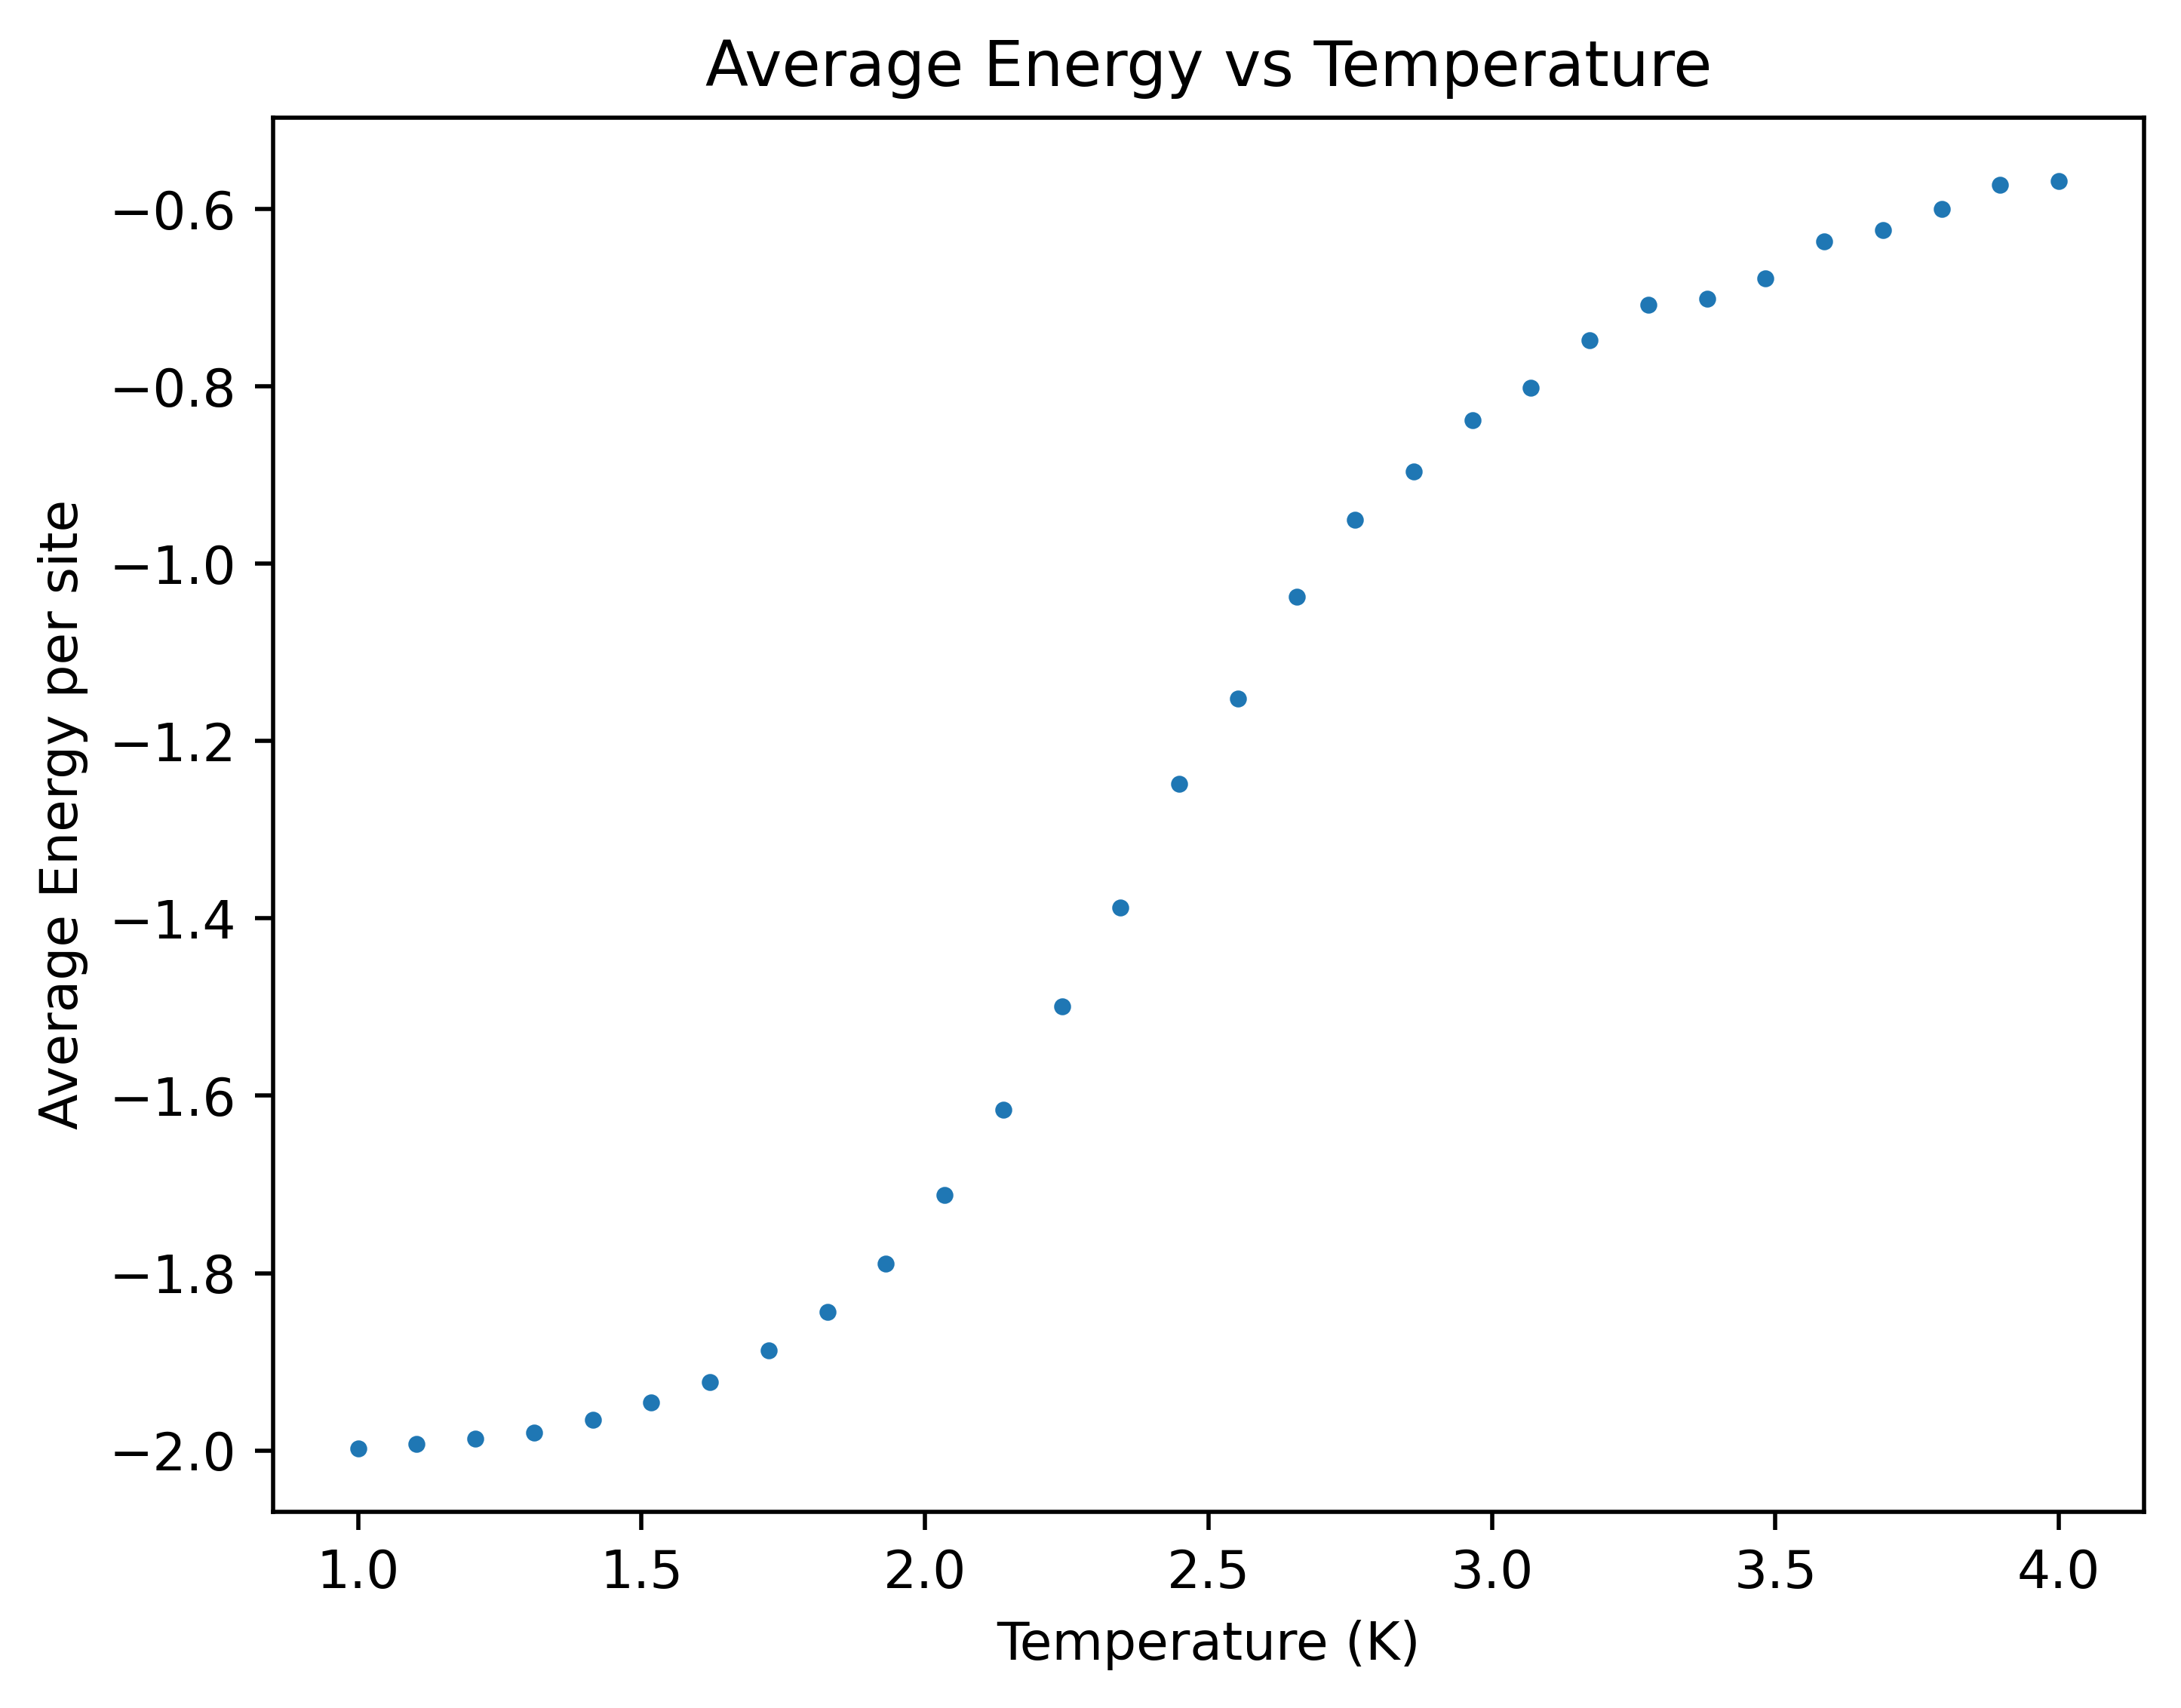

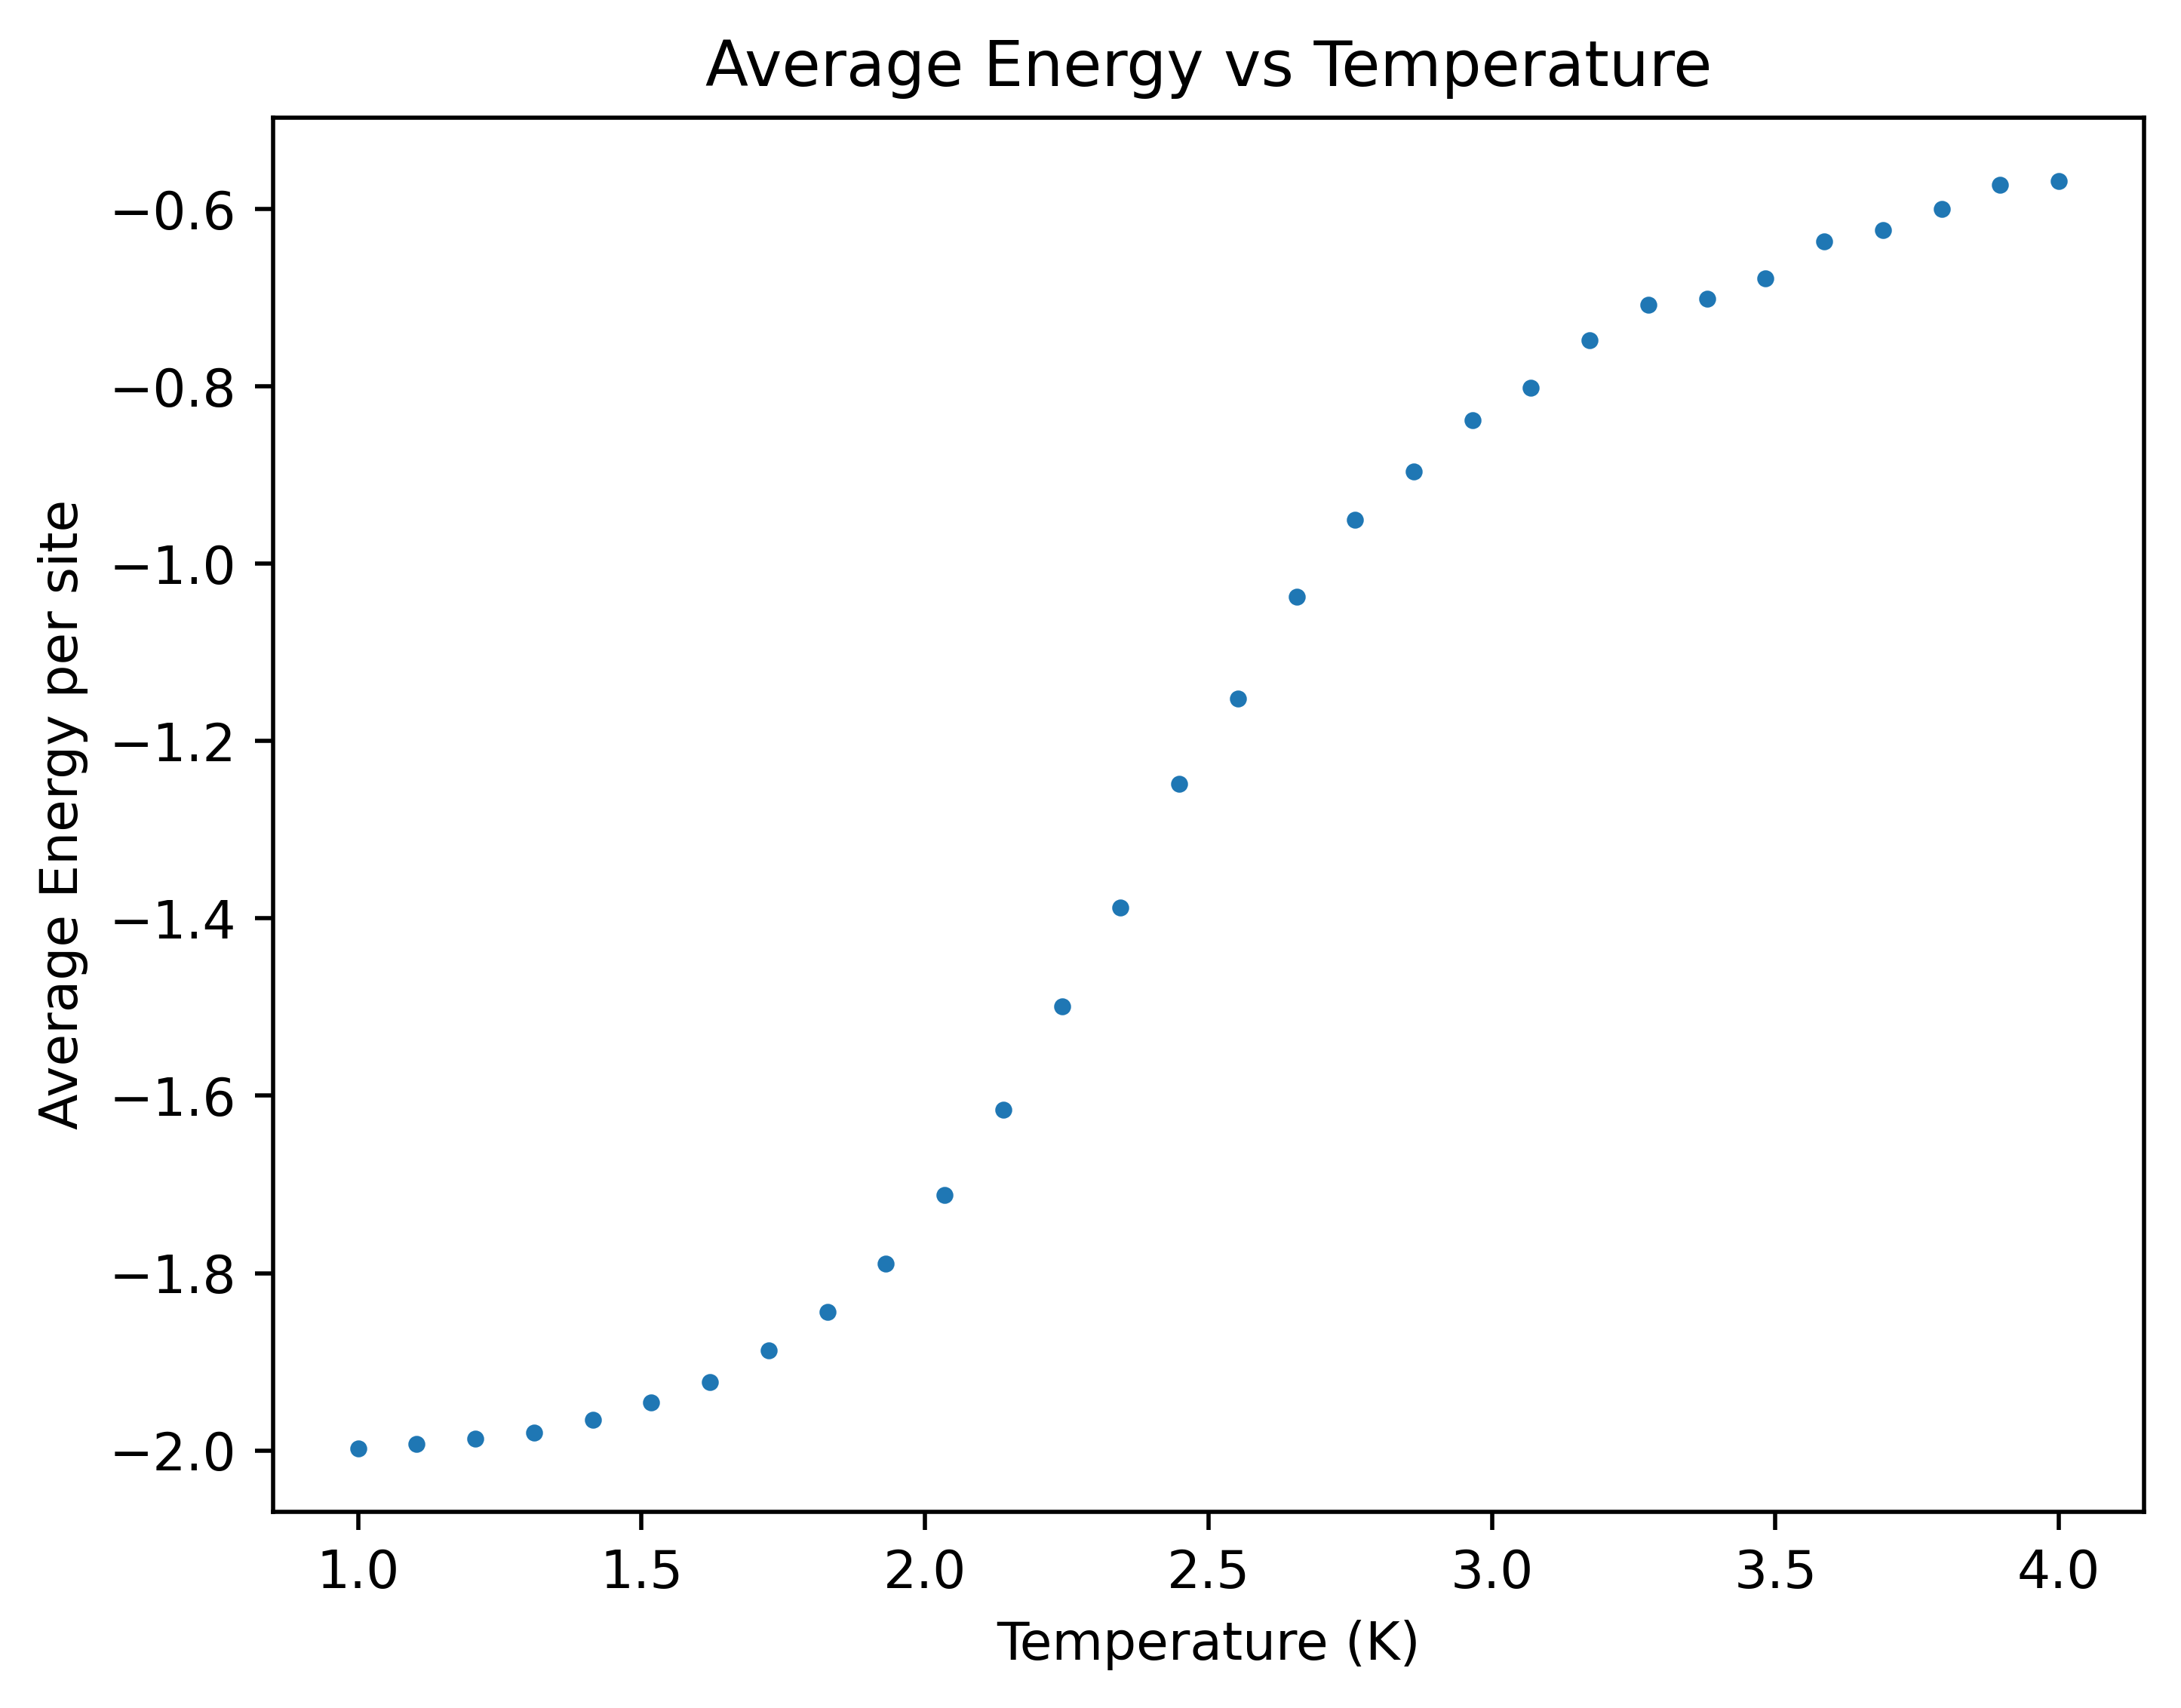

In [13]:
#this is just to investigate
plt.figure(dpi=500)
plt.scatter(temps,Es_norm,s=5)
plt.title('Average Energy vs Temperature')
plt.xlabel('Temperature (K)')
plt.ylabel('Average Energy per site')
# plt.savefig('MagvsT3',bbox_inches='tight')

plt.figure(dpi=500)
plt.scatter(temps,Es_norm,s=5)
plt.title('Average Energy vs Temperature')
plt.xlabel('Temperature (K)')
plt.ylabel('Average Energy per site')
# plt.savefig('nrgvstemp',bbox_inches='tight')

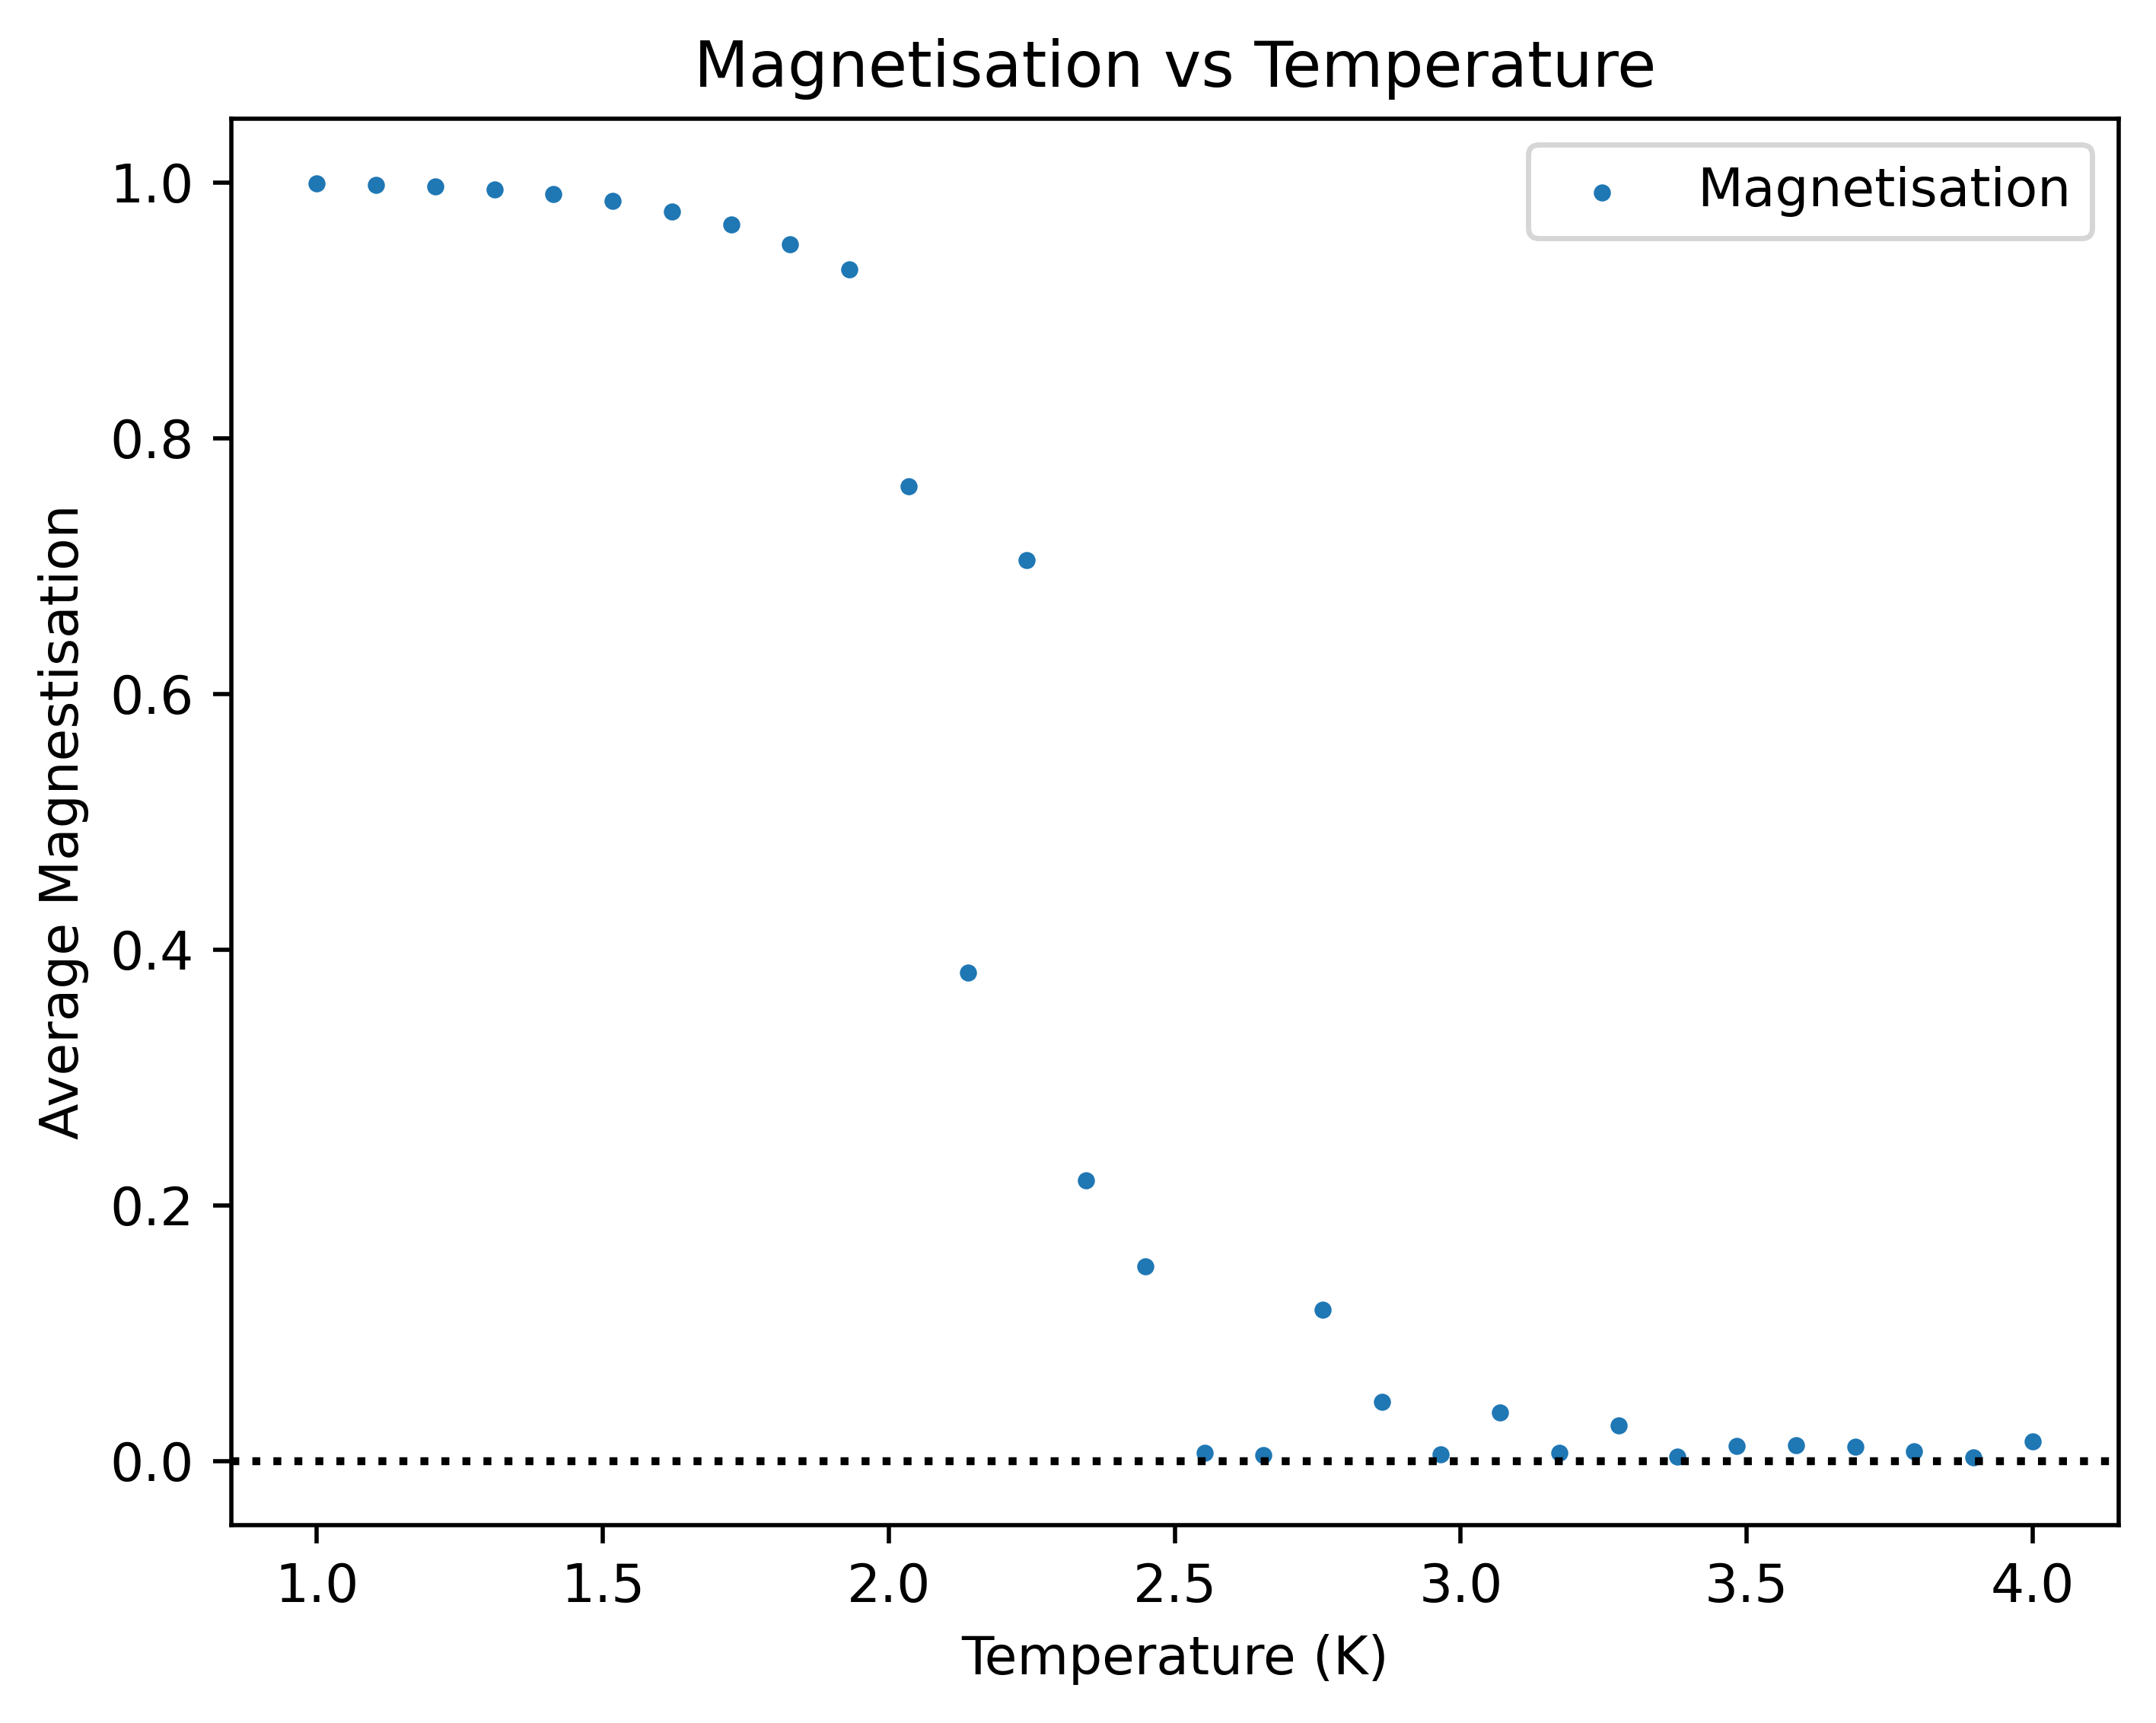

In [14]:
#magnetisation as required
#This plot was used multiple times when changing the initial conditions, number of sweeps etc

plt.figure(dpi=500) 
plt.axhline(0,c='black',ls=':')
plt.scatter(temps,Mags_norm,s=5,label='Magnetisation')
plt.title('Magnetisation vs Temperature')#, only 10 sweeps')
plt.xlabel('Temperature (K)')
plt.ylabel('Average Magnestisation')
# plt.plot(temps[9:15],ys,c='c',linewidth=1,label='Linear fit for T$_c$')
plt.ylim(-0.05,1.05)
# plt.xticks(np.arange(min(temps), max(temps)+1, 0.25))
plt.legend(loc='upper right')
# plt.savefig('MagvsTlowsweeps',bbox_inches='tight')
#looks like approx 2.4 ±0.1K

In [15]:
Mags_norm[7]

0.9669199999999999

In [16]:
Mags_norm[32:]
regress = linregress(temps[10:14],Mags_norm[10:14])
regress

LinregressResult(slope=-1.2626406666666685, intercept=3.2819226666666705, rvalue=-0.6497558871692104, pvalue=0.3502441128307896, stderr=1.0445033020333931, intercept_stderr=2.2902903493637314)

In [17]:
#used to find Tc
m,c = regress[0], regress[1]
ys = [m*i+c for i in temps[9:15]]
Tc = -c/m
# print(Tc)

In [18]:
##Now let Tc = 2.4
#and vary the size of the system
        #need to work out how to get specific heat capacity and mag susceptibility
        #what is the expectation value? just minus E - dE^2?

In [19]:
sizes = [int(i) for i in np.linspace(2,51,49,endpoint=False)] #the sizes of lattice we are iterating through
Cvs = [] #heat capacity
MagSusc = [] #magnetic susceptibility
Tc = 2.4

Mags2 = []
dMs2 = []
Es2 = []
dEs2 = []

for L in sizes:
    lattice = IsingLattice2D(L,Tc,h)
    M,dM,E,dE = lattice.metropolis()
    Mags2.append(M)
    dMs2.append(dM)
    Es2.append(E)
    dEs2.append(dE/L) #changed to get specific heat capacity

Text(0.5, 0, 'Size')

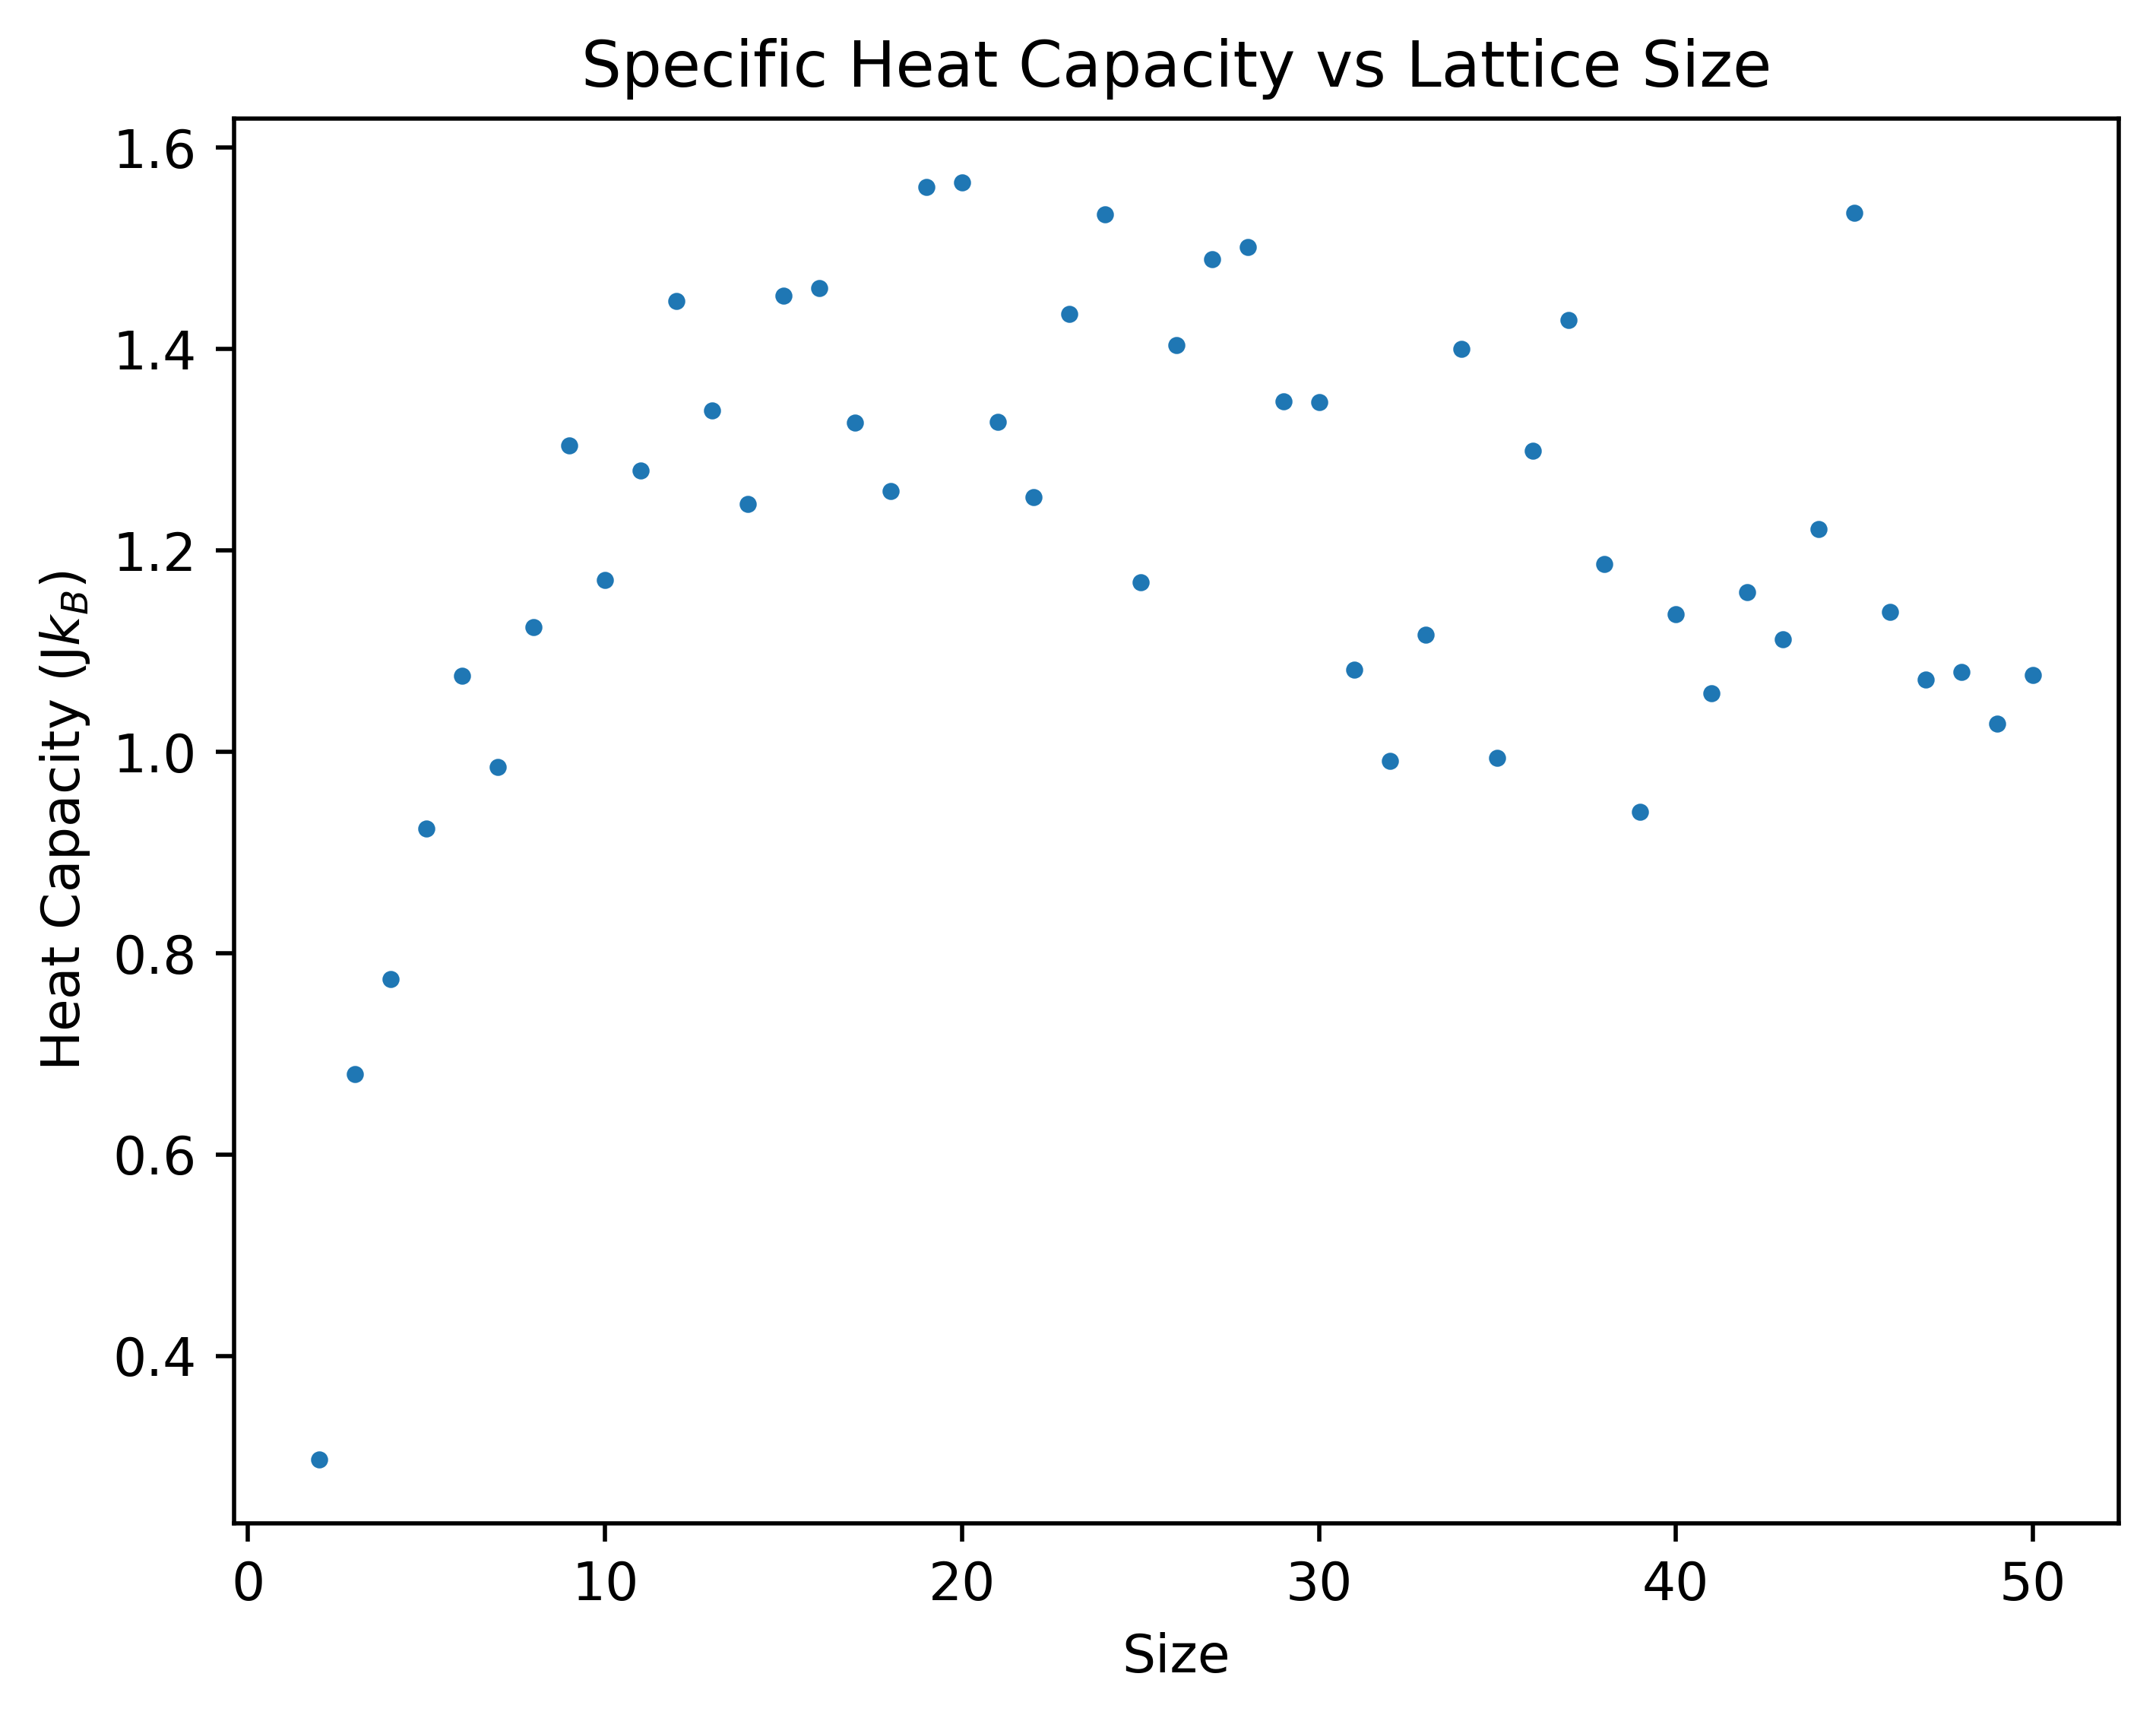

In [20]:
#Cvs = (1/(Tc**2))*dE**2 because dE = sqrt(exp - exp )
Cvs = [(1/(Tc**2))*delE**2 for delE in dEs2] #taking kB = 1
plt.figure(dpi=500)
plt.scatter(sizes,Cvs,s=5)
plt.title('Specific Heat Capacity vs Lattice Size')
plt.ylabel('Heat Capacity (J$k_B$)') #specific heat capacity or no?
plt.xlabel('Size')

# plt.savefig('specheat',bbox_inches='tight')

In [21]:
MagSusc = [(1/Tc)*delM**2 for delM in dMs2]

Text(0.5, 0, 'Lattice Size')

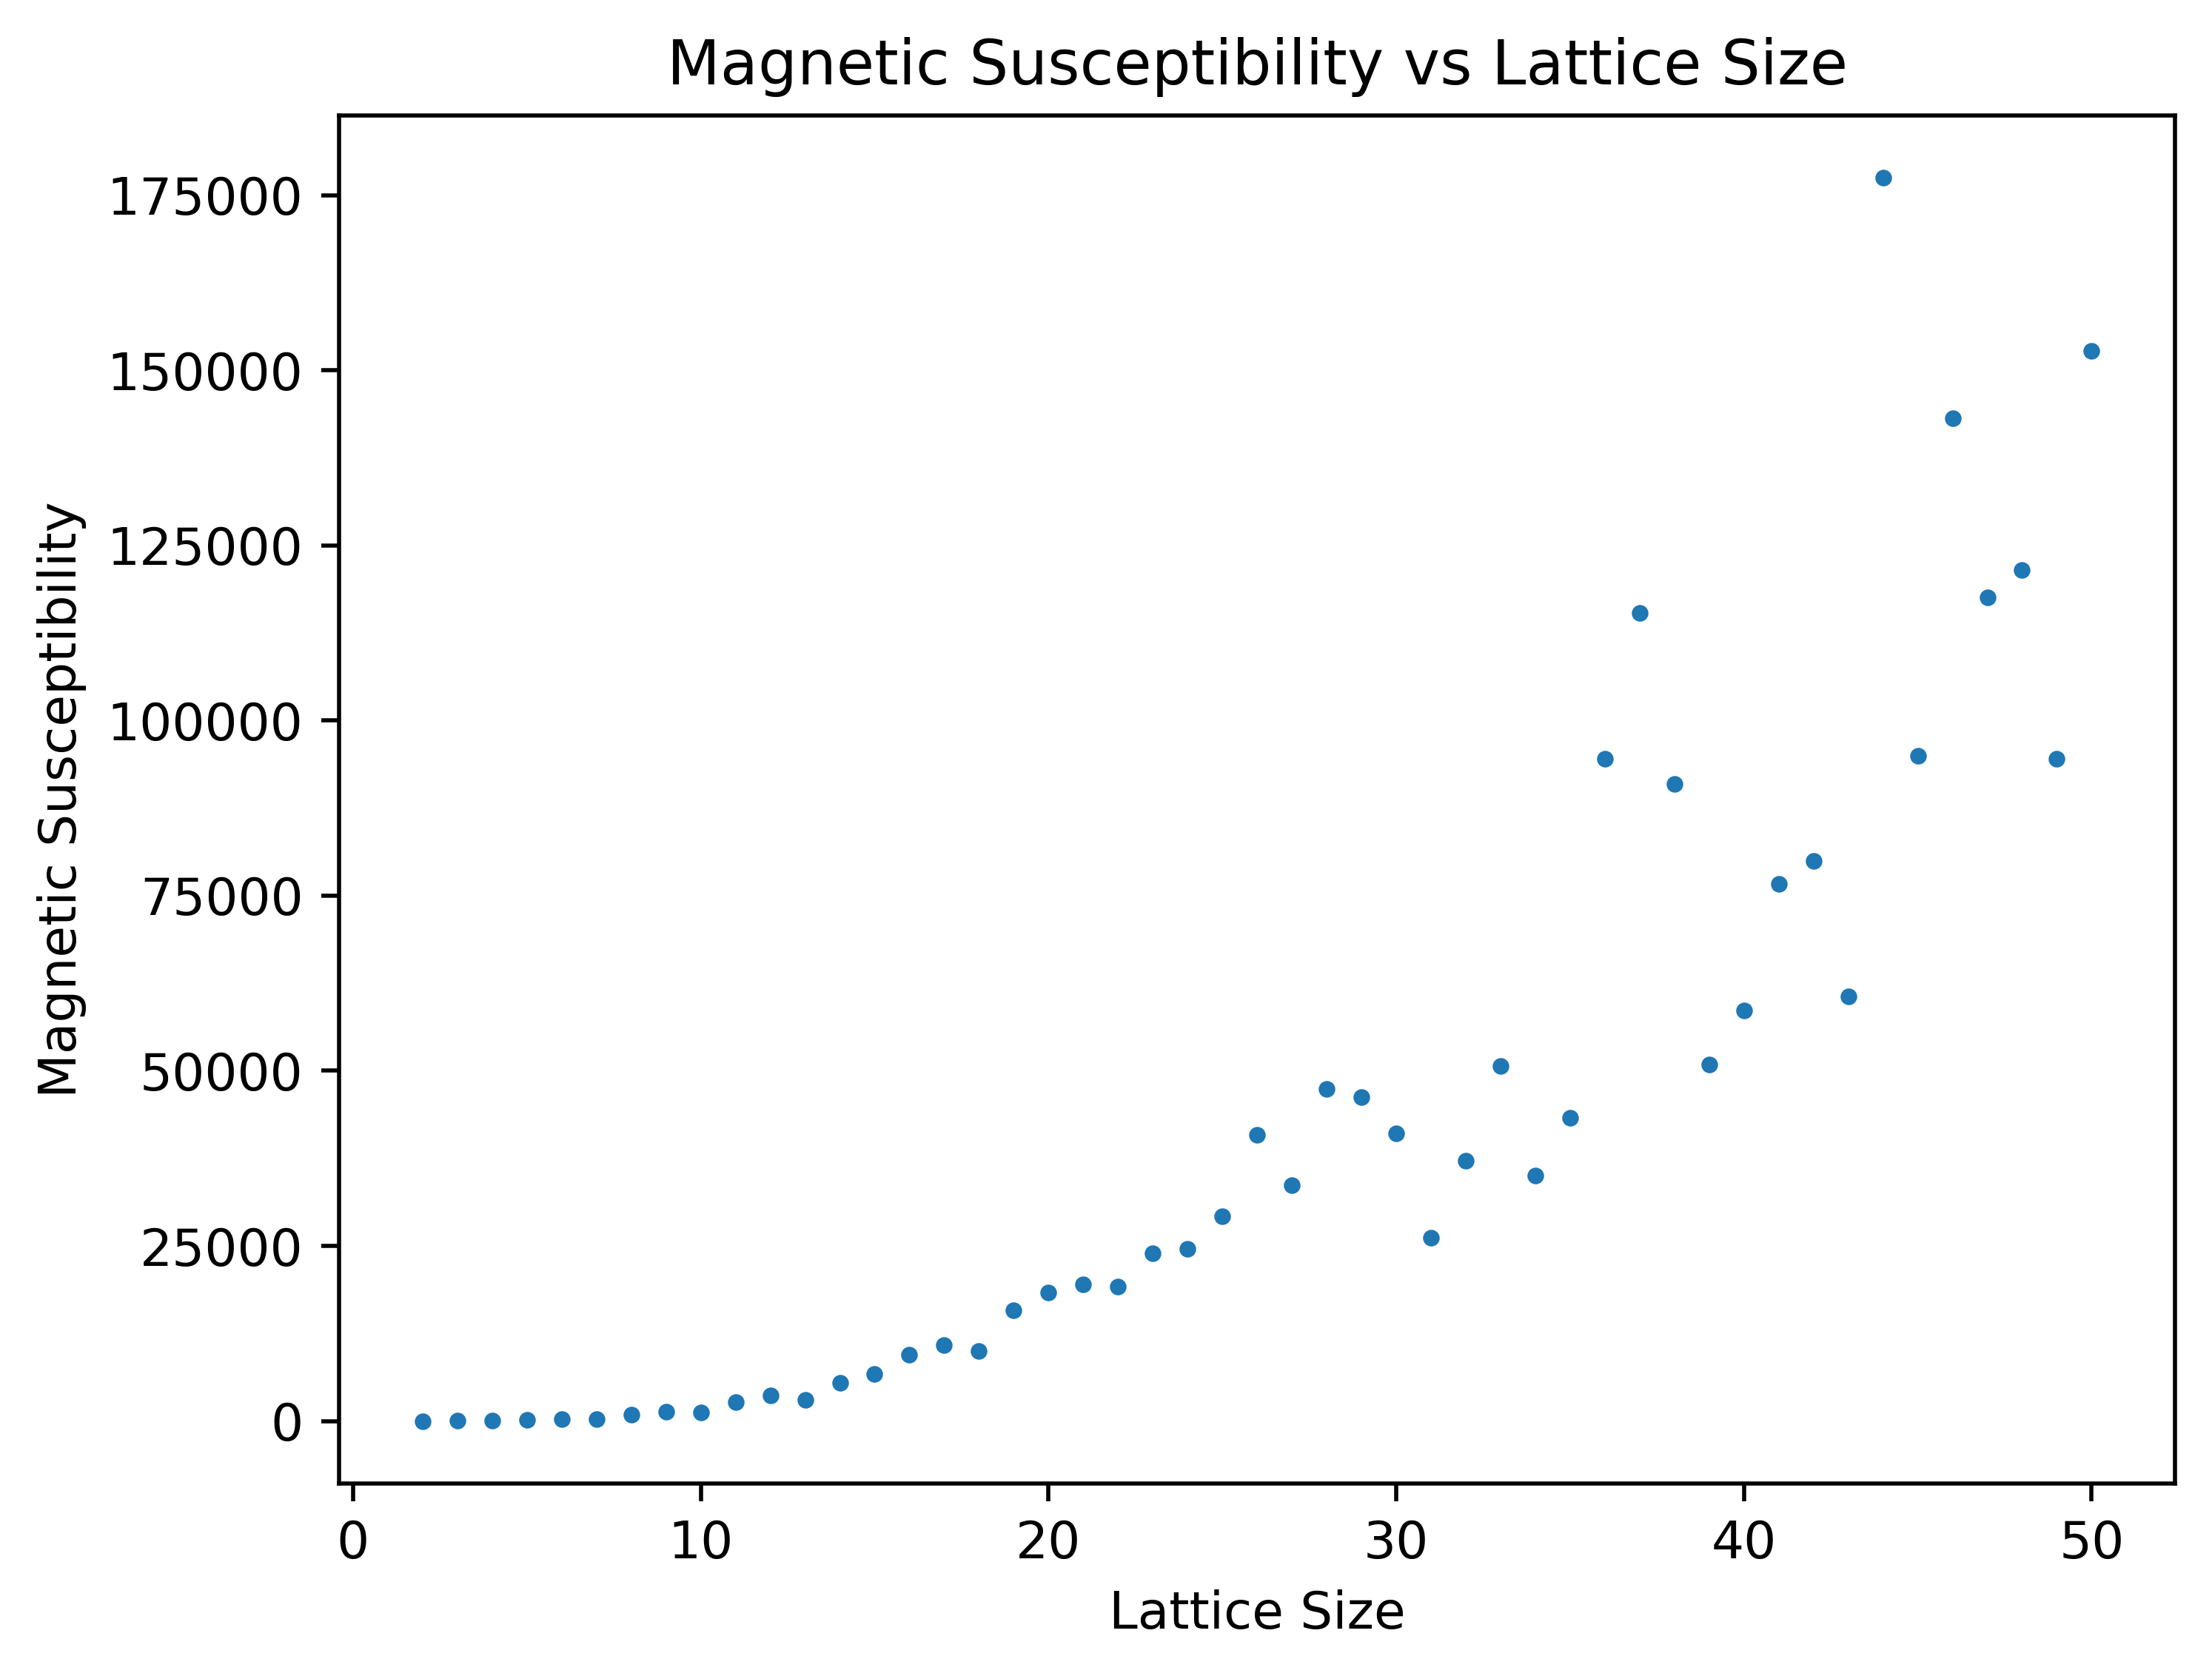

In [22]:
plt.figure(dpi=500)
plt.scatter(sizes,MagSusc,s=5)
plt.title('Magnetic Susceptibility vs Lattice Size')
plt.ylabel('Magnetic Susceptibility') #specific heat capacity or no?
plt.xlabel('Lattice Size')
# plt.savefig('magsusceptibility',bbox_inches='tight')